In [1]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go
import cufflinks as cf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Vital_Statistics_Deaths_by_Region_and_Age-Group_by_Selected_Cause_of_Death___Beginning_2003.csv')

In [3]:
data.dtypes

Year                        int64
Sex                        object
Age Group                  object
Race or Ethnicity          object
Selected Cause of Death    object
Deaths                      int64
dtype: object

In [4]:
data

,Year,Sex,Age Group,Race or Ethnicity,Selected Cause of Death,Deaths
0,2016,M,85+,Black Non Hispanic,Accidents,18
1,2016,M,45-54,Hispanic,Cerebrovascular Disease,31
2,2016,M,25-34,Other Non Hispanic,Pneumonia,1
3,2016,F,9-Jan,Black Non Hispanic,Malignant Neoplasms,5
4,2016,M,65-74,Black Non Hispanic,Diseases of the Heart,709
5,2016,M,55-64,White Non Hispanic,Diabetes Mellitus,43
6,2016,M,55-64,Other Non Hispanic,Diabetes Mellitus,7
7,2016,F,25-34,Not Stated,All Other Causes,10
8,2016,M,65-74,Black Non Hispanic,Pneumonia,87
9,2016,M,65-74,Hispanic,Total,1399


In [5]:
arr = data['Age Group'].unique()
for age in range(len(arr)):
    print(arr[age])
print(data['Age Group'].unique())
print(arr)
print(len(arr))
print(range(len(arr)))
data['Age Group'].unique()

85+
45-54
25-34
9-Jan
65-74
55-64
20-24
19-Oct
<1
35-44
75-84
['85+' '45-54' '25-34' '9-Jan' '65-74' '55-64' '20-24' '19-Oct' '<1'
 '35-44' '75-84']
['85+' '45-54' '25-34' '9-Jan' '65-74' '55-64' '20-24' '19-Oct' '<1'
 '35-44' '75-84']
11
range(0, 11)


array(['85+', '45-54', '25-34', '9-Jan', '65-74', '55-64', '20-24',
       '19-Oct', '<1', '35-44', '75-84'], dtype=object)

In [6]:
data['Race or Ethnicity'].unique()

array(['Black Non Hispanic', 'Hispanic', 'Other Non Hispanic',
       'White Non Hispanic', 'Not Stated'], dtype=object)

In [7]:
data['Selected Cause of Death'].unique()

array(['Accidents', 'Cerebrovascular Disease', 'Pneumonia',
       'Malignant Neoplasms', 'Diseases of the Heart',
       'Diabetes Mellitus', 'All Other Causes', 'Total', 'CLRD', 'AIDS'],
      dtype=object)

In [8]:
#creates a numpy array object
data_arr = data['Year'].unique()
print(type(data_arr))

#convert the object into a list
data_list = data_arr.tolist()
print(type(data_list))
print(data_arr)

#reverses the list
data_list.reverse()
print(data_list)
print("numpy array object: {}".format(np.arange(len(data_arr))))
print("list: {}".format(np.arange(len(data_list))))

#NOTE: np.arange() returns a numpy array object

<class 'numpy.ndarray'>
<class 'list'>
[2016 2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003]
[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
numpy array object: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
list: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


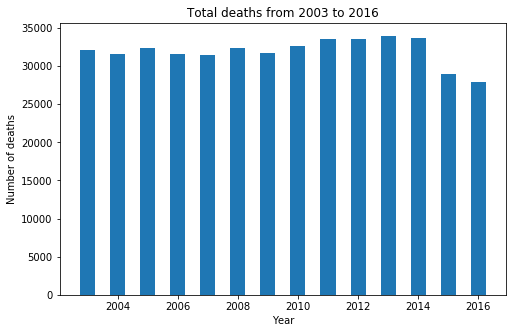

In [9]:
#creates a figure with a custom figure size
plt.figure(figsize=(8, 5))
#creates bar chart with the Year as the x-axis and the number of deaths as the y-axis
plt.bar(data.Year, data.Deaths, width = 0.5)
plt.title("Total deaths from 2003 to 2016")
plt.xlabel("Year")
plt.ylabel("Number of deaths")
plt.show()

In [10]:
#creates a new dataframe that isolates 2016 data
twentysixteen = data[data.Year == 2016]

In [11]:
#prints the dataframe
twentysixteen

,Year,Sex,Age Group,Race or Ethnicity,Selected Cause of Death,Deaths
0,2016,M,85+,Black Non Hispanic,Accidents,18
1,2016,M,45-54,Hispanic,Cerebrovascular Disease,31
2,2016,M,25-34,Other Non Hispanic,Pneumonia,1
3,2016,F,9-Jan,Black Non Hispanic,Malignant Neoplasms,5
4,2016,M,65-74,Black Non Hispanic,Diseases of the Heart,709
5,2016,M,55-64,White Non Hispanic,Diabetes Mellitus,43
6,2016,M,55-64,Other Non Hispanic,Diabetes Mellitus,7
7,2016,F,25-34,Not Stated,All Other Causes,10
8,2016,M,65-74,Black Non Hispanic,Pneumonia,87
9,2016,M,65-74,Hispanic,Total,1399


In [12]:
data.groupby('Race or Ethnicity')['Deaths'].sum()

Race or Ethnicity
Black Non Hispanic      84366
Hispanic              3608620
Not Stated               8174
Other Non Hispanic      21666
White Non Hispanic     451396
Name: Deaths, dtype: int64

In [13]:
data.groupby('Year').get_group(2003)

,Year,Sex,Age Group,Race or Ethnicity,Selected Cause of Death,Deaths
5466,2003,M,<1,White Non Hispanic,Accidents,1
5467,2003,M,<1,Not Stated,Total,2
5468,2003,M,<1,Not Stated,All Other Causes,2
5469,2003,M,<1,Hispanic,Total,837
5470,2003,M,<1,Hispanic,All Other Causes,801
5471,2003,M,<1,Hispanic,Accidents,14
5472,2003,M,<1,Hispanic,Pneumonia,10
5473,2003,M,<1,Hispanic,Diseases of the Heart,10
5474,2003,M,<1,Hispanic,Malignant Neoplasms,2
5475,2003,M,<1,Black Non Hispanic,Total,4


In [14]:
#groups by year and race or ethnicity and sums the number of deaths
data.groupby(['Year', 'Race or Ethnicity'])['Deaths'].sum()

Year  Race or Ethnicity 
2003  Black Non Hispanic       212
      Hispanic              309016
      Not Stated                50
      Other Non Hispanic        20
      White Non Hispanic       562
2004  Black Non Hispanic        80
      Hispanic              302236
      Not Stated                58
      Other Non Hispanic        14
      White Non Hispanic       350
2005  Black Non Hispanic        52
      Hispanic              301882
      Not Stated                38
      Other Non Hispanic        16
      White Non Hispanic       202
2006  Black Non Hispanic        44
      Hispanic              295194
      Not Stated                66
      Other Non Hispanic         8
      White Non Hispanic       208
2007  Black Non Hispanic        38
      Hispanic              292938
      Not Stated                50
      Other Non Hispanic         8
      White Non Hispanic       160
2008  Black Non Hispanic        44
      Hispanic              295252
      Not Stated              

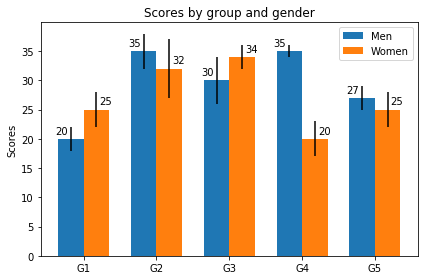

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


men_means, men_std = (20, 35, 30, 35, 27), (2, 3, 4, 1, 2)
women_means, women_std = (25, 32, 34, 20, 25), (3, 5, 2, 3, 3)

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, men_means, width, yerr=men_std,
                label='Men')
rects2 = ax.bar(ind + width/2, women_means, width, yerr=women_std,
                label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()

plt.show()

In [16]:
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'pre_score': [4, 24, 31, 2, 3],
        'mid_score': [25, 94, 57, 62, 70],
        'post_score': [5, 43, 23, 23, 51]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'pre_score', 'mid_score', 'post_score'])
df

,first_name,pre_score,mid_score,post_score
0,Jason,4,25,5
1,Molly,24,94,43
2,Tina,31,57,23
3,Jake,2,62,23
4,Amy,3,70,51


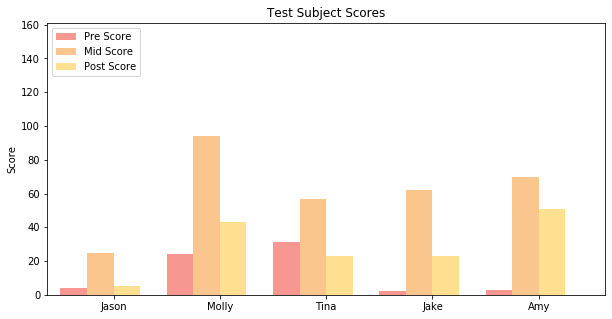

In [17]:
# Setting the positions and width for the bars
pos = list(range(len(df['pre_score']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        df['pre_score'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=df['first_name'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        df['mid_score'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=df['first_name'][1]) 

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df['post_score'] data,
        df['post_score'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in first_name
        label=df['first_name'][2]) 

# Set the y axis label
ax.set_ylabel('Score')

# Set the chart's title
ax.set_title('Test Subject Scores')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['first_name'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df['pre_score'] + df['mid_score'] + df['post_score'])] )

# Adding the legend and showing the plot
plt.legend(['Pre Score', 'Mid Score', 'Post Score'], loc='upper left')
#plt.grid()
plt.show()


In [18]:
men_means = (20, 35, 30, 35, 27)
ind = np.arange(len(men_means))
print(range(len(men_means)))
ind

range(0, 5)


array([0, 1, 2, 3, 4])

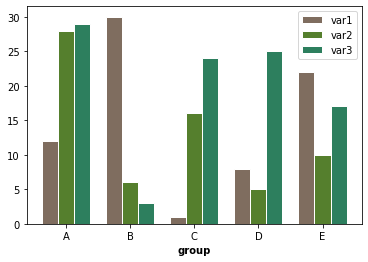

In [19]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [12, 30, 1, 8, 22]
bars2 = [28, 6, 16, 5, 10]
bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
 
# Create legend & Show graphic
plt.legend()
plt.show()
